In [2]:
import requests
res = requests.get('https://tw.screener.finance.yahoo.net/future/q?type=tick&perd=1m&mkt=01&sym=WTX%26')
res.text

'null({"mkt":"01","id":"WTX&","perd":"1m","type":"tick","mem":{"id":"WTX&","name":"台指期近一","TradeDay":"20221003","542":1.908277,"543":2.016783,"545":23239,"546":12178,"547":25115,"548":12453,"553":23239,"554":12178,"555":25115,"556":12453,"557":23239,"558":12178,"559":25115,"560":12453,"569":0.0,"101":13356.0,"102":13357.0,"103":13355.0,"104":13358.0,"105":13354.0,"106":13359.0,"107":13353.0,"108":13360.0,"109":13352.0,"110":13361.0,"113":12,"114":14,"115":42,"116":19,"117":37,"118":36,"119":21,"120":20,"121":29,"122":23,"125":13356.0,"126":13420.0,"127":0.0,"128":215304,"129":13394.0,"130":13465.0,"131":13351.0,"132":14733.0,"645":11368,"133":12055.0,"646":9205,"647":376,"143":190753,"144":20221003,"145":0.0,"156":13394.0,"157":13192.0,"158":13595.0,"159":13294.0,"160":13496.0,"172":0.851127,"177":0.0,"178":0.0,"179":2.0,"180":0.0,"181":0.0,"182":13355.0,"183":13356.0,"184":-38.0,"185":-0.283709,"205":13394.0,"206":73202,"207":19265.0,"211":12873.0,"212":15380.0,"213":13291.0,"214":119

In [4]:
import re
m = re.findall('{"t":(\d+),"p":([\d.]+),"v":([\d.]+)}', res.text)

In [5]:
import pandas
df = pandas.DataFrame(m)

/Users/david/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [6]:
df

,0,1,2
0,202209301501,13413.00,389.00
1,202209301502,13410.00,240.00
2,202209301503,13424.00,182.00
3,202209301504,13421.00,103.00
4,202209301505,13425.00,122.00
...,...,...,...
243,202209301904,13367.00,79.00
244,202209301905,13355.00,406.00
245,202209301906,13351.00,217.00
246,202209301907,13358.00,102.00


In [7]:
df.columns = ['dt', 'price', 'volume']

In [8]:
df.head()

,dt,price,volume
0,202209301501,13413.00,389.00
1,202209301502,13410.00,240.00
2,202209301503,13424.00,182.00
3,202209301504,13421.00,103.00
4,202209301505,13425.00,122.00


In [10]:
df['dt'] = pandas.to_datetime(df['dt'], format = '%Y%m%d%H%M')

In [11]:
df.head()

,dt,price,volume
0,2022-09-30 15:01:00,13413.00,389.00
1,2022-09-30 15:02:00,13410.00,240.00
2,2022-09-30 15:03:00,13424.00,182.00
3,2022-09-30 15:04:00,13421.00,103.00
4,2022-09-30 15:05:00,13425.00,122.00


In [13]:
df['price'] = df['price'].astype(float)

<AxesSubplot:xlabel='dt'>

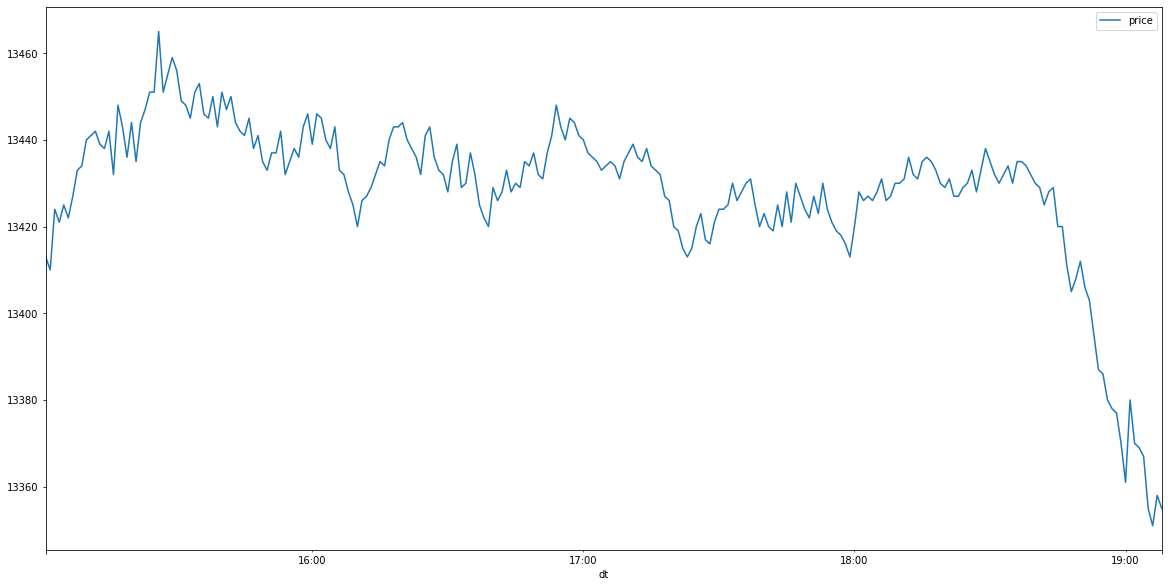

In [15]:
df.plot(x = 'dt', y ='price', kind = 'line', figsize = [20,10])